# AI/ML Challenge to predict chances of survival of a patient

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [137]:
# Function to load dataset
def load_data(data):
    df = pd.read_csv(data)
    return df

# Data Preparation

In [138]:
url = 'data/Train_Data.csv'
df = load_data(url)
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [139]:
df.shape

(23097, 18)

In [140]:
df['Patient_ID'].nunique()

10570

1    14603
0     8494
Name: Survived_1_year, dtype: int64


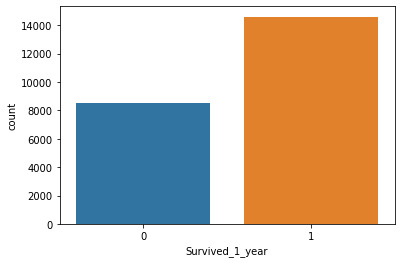

In [141]:
# Checking for distribution of target variable
sns.countplot(df['Survived_1_year']) 
print(df['Survived_1_year'].value_counts())

In [142]:
df.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

In [143]:
# check for irregularities in each categorical columns
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [144]:
print_unique_col_values(df)

Treated_with_drugs : ['DX6' 'DX2 ' 'DX1 ' nan 'DX3 ' 'DX5 ' 'DX4 ' 'DX2 DX5 ' 'DX2 DX3 '
 'DX1 DX3 ' 'DX1 DX2 ' 'DX3 DX4 ' 'DX1 DX4 ' 'DX1 DX5 ' 'DX2 DX4 DX5 '
 'DX1 DX2 DX3 ' 'DX3 DX5 ' 'DX2 DX4 ' 'DX3 DX4 DX5 ' 'DX2 DX3 DX5 '
 'DX1 DX2 DX3 DX4 ' 'DX4 DX5 ' 'DX2 DX3 DX4 ' 'DX1 DX4 DX5 '
 'DX1 DX2 DX4 ' 'DX1 DX3 DX5 ' 'DX1 DX2 DX5 ' 'DX1 DX3 DX4 '
 'DX1 DX3 DX4 DX5 ' 'DX1 DX2 DX4 DX5 ' 'DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX5 ' 'DX1 DX2 DX3 DX4 DX5 ']
Patient_Smoker : ['YES' 'NO' 'Cannot say']
Patient_Rural_Urban : ['URBAN' 'RURAL']
Patient_mental_condition : ['Stable']


In [145]:
# checking for missing values in the data
df.isnull().sum().sort_values(ascending=False)

A                            1235
B                            1235
Number_of_prev_cond          1235
Z                            1235
F                            1235
E                            1235
D                            1235
C                            1235
Treated_with_drugs             13
ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_mental_condition        0
Patient_Rural_Urban             0
Patient_Smoker                  0
Patient_Body_Mass_Index         0
Patient_Age                     0
Patient_ID                      0
Survived_1_year                 0
dtype: int64

In [146]:
# function to impute missing values
def missing_val_imputer(input_data):
    for column in input_data.columns:
        input_data[column].fillna(input_data[column].mode()[0], inplace=True)

In [147]:
X = df.drop(['Patient_ID', 'ID_Patient_Care_Situation', 'Survived_1_year'], axis=1)
y = df['Survived_1_year']
print(X.shape)
print(y.shape)

(23097, 15)
(23097,)


# Exploratory Data Analysis

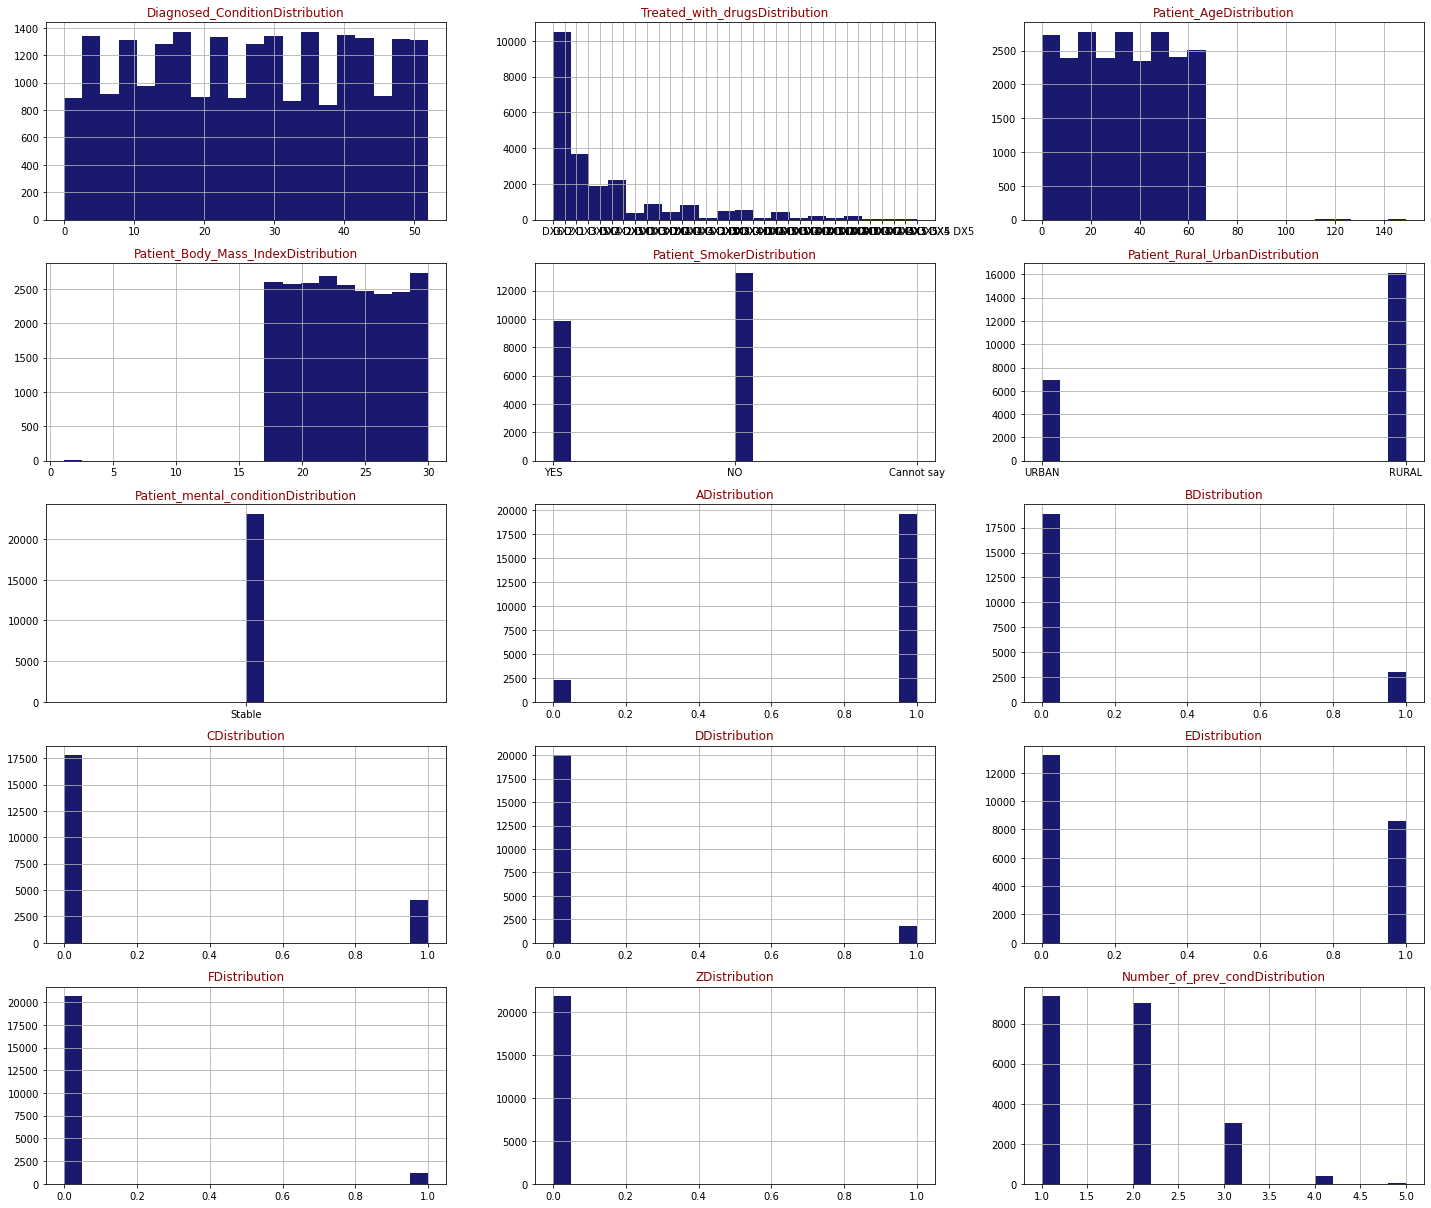

In [148]:
def draw_hist(data, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows, cols, i + 1)
        data[feature].hist(bins=20, ax=ax, facecolor='midnightblue')
        ax.set_title(feature+'Distribution', color='DarkRed')
    fig.tight_layout()
    plt.show()
draw_hist(X, X.columns, 6, 3)

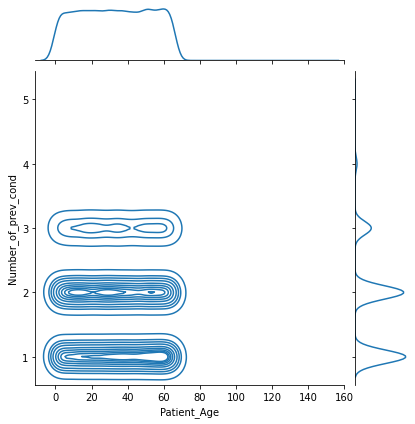

In [149]:
sns.jointplot(x='Patient_Age',y='Number_of_prev_cond',data=df, kind= 'kde')

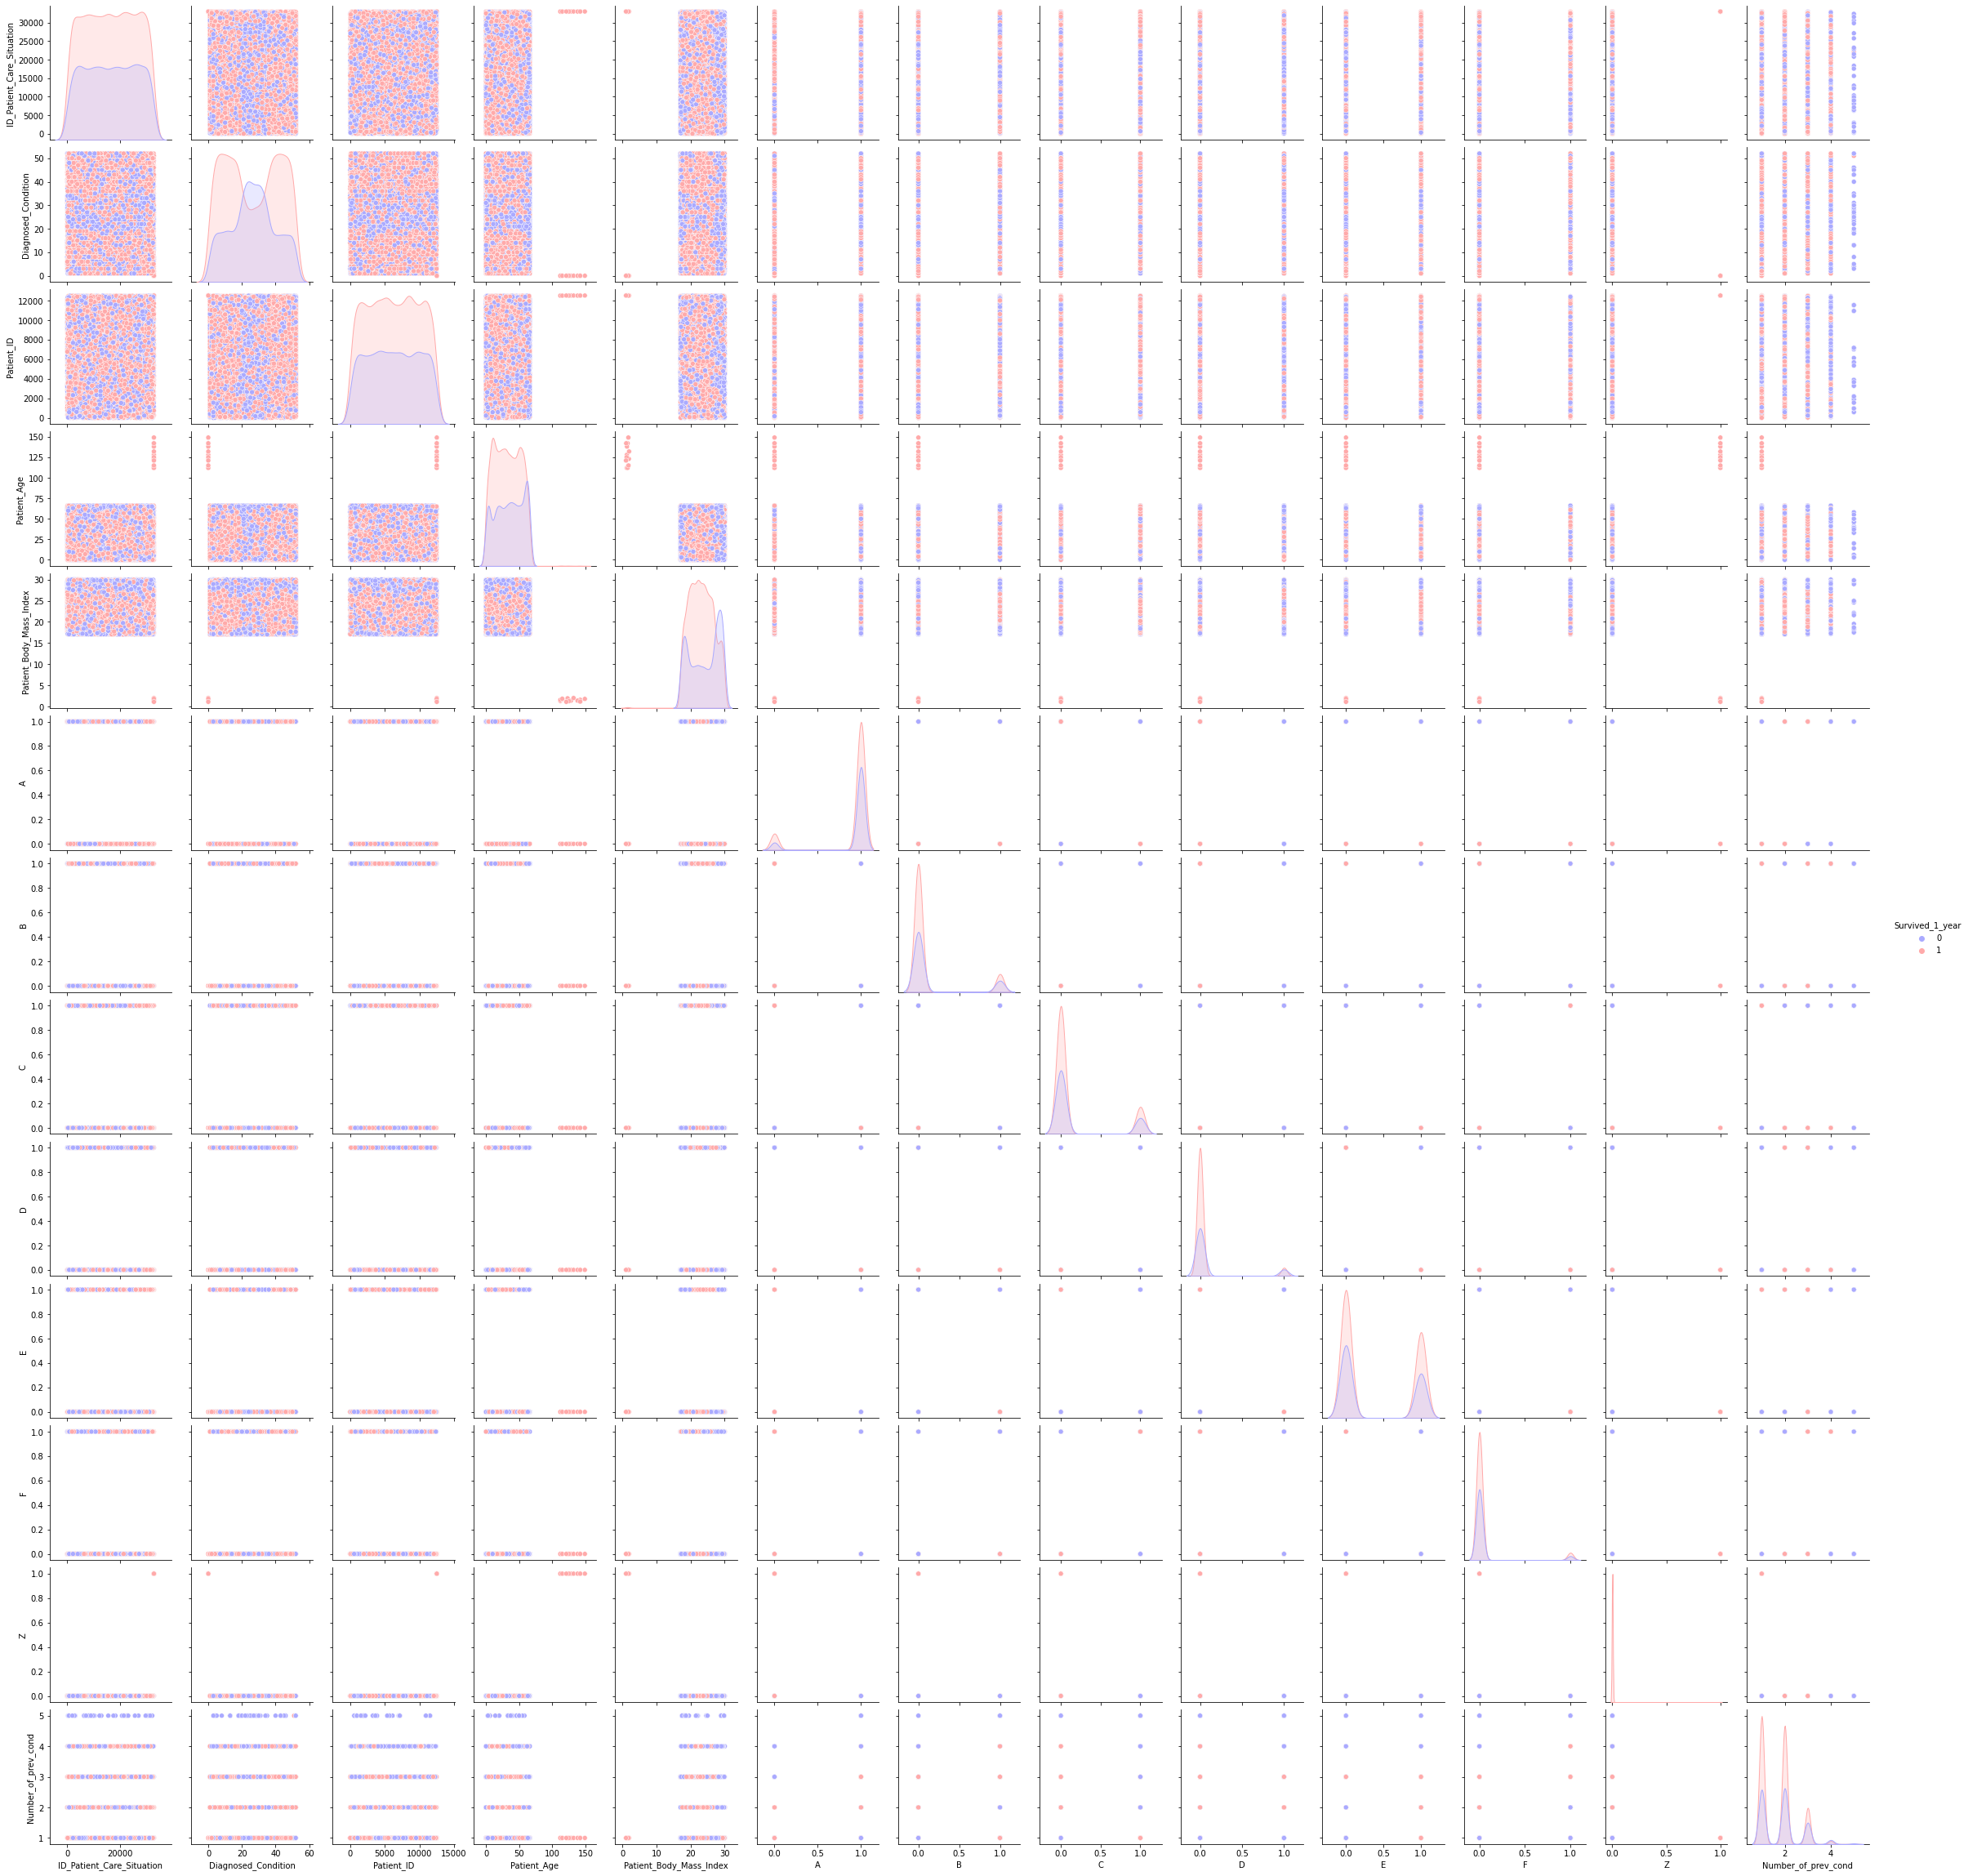

In [150]:
# checking for outliers
sns.pairplot(df,hue='Survived_1_year',palette='bwr')

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)

(16167, 15)
(16167,)


In [152]:
# Buiding a transformer for numeric values and onehot enconder for cateorical values
num_transformer = Pipeline(steps=[('missing values', missing_val_imputer(X_train)), ('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('missing values', missing_val_imputer(X_train)),
                                  ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [153]:
# Combine both transformers into one pipeline
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, selector(dtype_include=['float64', 'int64'])),
                                               ('cat', cat_transformer, selector(dtype_include='object'))])

In [154]:
lgr_classifier = LogisticRegression(penalty='l2', class_weight=None)

In [155]:
#Build classifier
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', lgr_classifier)])

In [156]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('missing '
                                                                   'values',
                                                                   None),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002348853A730>),
                                                 ('cat',
                                                  Pipeline(steps=[('missing '
                                                                   'values',
                                                                   None),
                                                                  ('onehot',
             

In [157]:
print(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())
# print("Accuracy score the task2: ", clf.score(X_test, y_test))

0.7275938016294166


In [158]:
# y_pred = clf.predict(X_test)

In [159]:
missing_val_imputer(X_test)

In [160]:
print("Accuracy score the task2: ", clf.score(X_test, y_test))

Accuracy score the task2:  0.7362193362193362


In [161]:
y_pred = clf.predict(X_test)

In [162]:
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [163]:
f1_score(y_test, y_pred)

0.8049509176269739

In [164]:
from sklearn.svm import SVC

In [165]:
svm = SVC(kernel="rbf")

In [166]:
clf2 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', svm )])

In [167]:
clf2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('missing '
                                                                   'values',
                                                                   None),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002348853A730>),
                                                 ('cat',
                                                  Pipeline(steps=[('missing '
                                                                   'values',
                                                                   None),
                                                                  ('onehot',
             

In [168]:
print(cross_val_score(clf2, X_train, y_train, cv=5, scoring='accuracy').mean())
print("Accuracy score the task2: ", clf2.score(X_test, y_test))

0.7937772403902932
Accuracy score the task2:  0.7963924963924964


In [169]:
y_pred_2 = clf2.predict(X_test)

In [170]:
f1_score(y_test, y_pred_2)

0.8447915520844791

In [175]:
test_df = load_data('data\Test_data.csv')

In [176]:
y_pred_2 = clf2.predict(test_df)

In [180]:
final_df= pd.DataFrame(y_pred_2)

In [181]:
final_df.head()

,0
0,1
1,1
2,1
3,1
4,1


In [182]:
final_df.columns=["prediction"]

In [183]:
final_df.head()

,prediction
0,1
1,1
2,1
3,1
4,1


In [184]:
final_df.to_csv('data\Sample_Submission_3.csv')